In [1]:
'''
Problem Statement
=================
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the 
policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Input - you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Target - whether the customer would be interested in Vehicle insurance (Interested or Not)
'''

'\nProblem Statement\n=================\nYour client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the \npolicyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.\n\nInput - you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.\n\nTarget - whether the customer would be interested in Vehicle insurance (Interested or Not)\n'

In [2]:
# Requirement Libraries
import pandas as pd
import numpy as np

In [3]:
# Requirement Libraries need for visualization 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data cleaning and pipelien libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [5]:
# Model selection Lib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [6]:
# Pickle file generation
import joblib

In [7]:
# Reading the train, test and submission data
train = pd.read_csv('hack_train.csv')
test = pd.read_csv('hack_test.csv')
submisssion = pd.read_csv('hack_submission.csv')

In [8]:
# To see the number of features and observations
train.shape,test.shape,submisssion.shape

((381109, 12), (127037, 11), (127037, 2))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
# Finding the null values for all the columns
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


## EDA Visualization

<Axes: title={'center': 'Pie chart of Percentage for target (Response)'}, ylabel='count'>

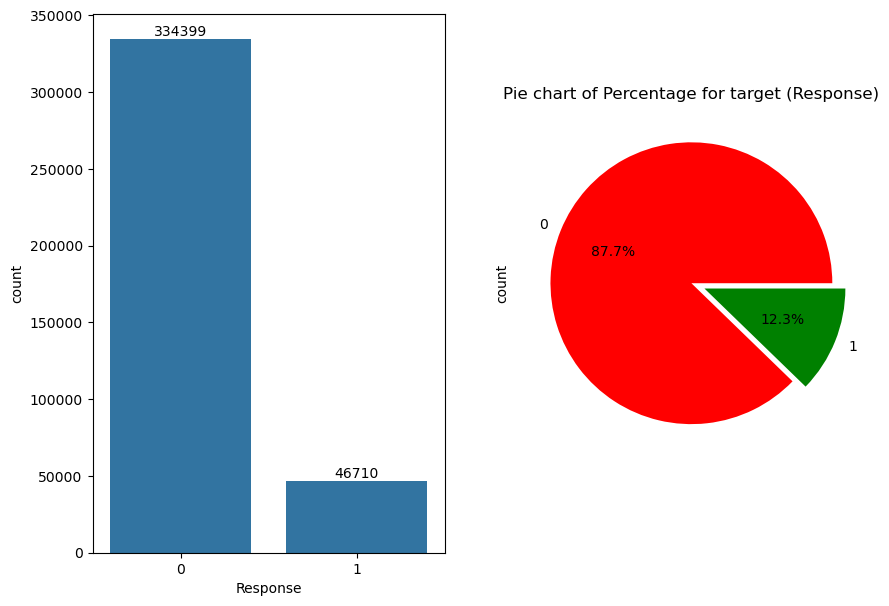

In [12]:
# Response (Target variable)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Response', data=train)
ax.bar_label(ax.containers[0])

plt.subplot(1, 2, 2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['red','green'], figsize = (10,7),explode = [0,0.1],title = "Pie chart of Percentage for target (Response)")

In [13]:
 # sns.pairplot(train)

In [14]:
# As per the above plot we could see the problem of imbalance binary classification problem

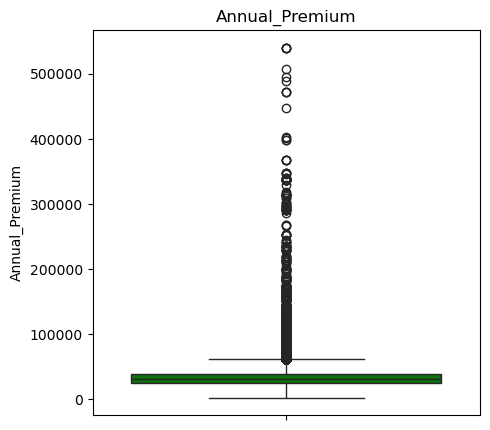

In [15]:
# Annual_Premium
plt.figure(figsize=(5,5))
sns.boxplot(train['Annual_Premium'],color='green')
plt.title("Annual_Premium")
plt.show()

In [16]:
col = train.columns.tolist()
col.remove('id')
train[col].describe()


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


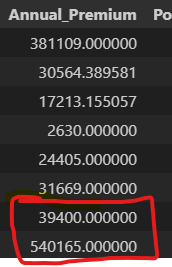

In [17]:
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<Axes: xlabel='Annual_Premium', ylabel='Density'>

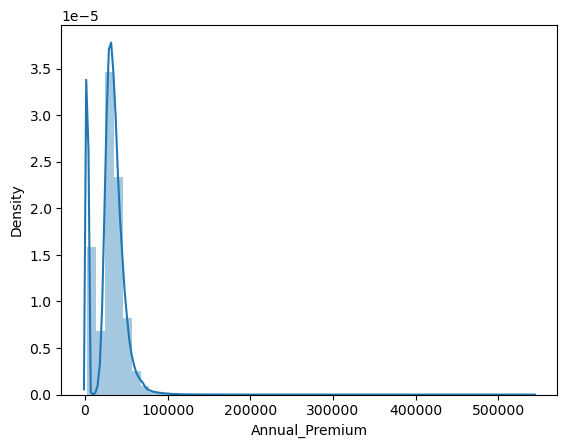

In [18]:
sns.distplot(train['Annual_Premium'])

In [19]:
# From the above boxplot and distplot we could see there is huge outliers in the variable, Consider this column needs to remove
# As per the data consideration in the above diagram, the data spread above 1L since we can cosinder the percentage to describe till 95% or 99% (Q4)

In [20]:
'''
 Based on the above description we could the outlier in Annual_Premium, By using IQR trying find this Annual_Premium
 Having outlier or not?
 Identify Potential Outliers for Annual_Premium Using IQR
 Q1 (25%): 24,405
 Q4 (99%): 72,963
 IQR: Q4 - Q1 = 48,558 
 Lower bound : Q1 - (1.5 * IQR) = 48,432
 Upper Bound : Q4 + (1.5 * IQR) = 1,82,407
 Values in Annual_Premium below 48,432 or above 1,82,407 are outliers. Hence this column has outliers.
'''

'\n Based on the above description we could the outlier in Annual_Premium, By using IQR trying find this Annual_Premium\n Having outlier or not?\n Identify Potential Outliers for Annual_Premium Using IQR\n Q1 (25%): 24,405\n Q4 (99%): 72,963\n IQR: Q4 - Q1 = 48,558 \n Lower bound : Q1 - (1.5 * IQR) = 48,432\n Upper Bound : Q4 + (1.5 * IQR) = 1,82,407\n Values in Annual_Premium below 48,432 or above 1,82,407 are outliers. Hence this column has outliers.\n'

<Axes: ylabel='Age'>

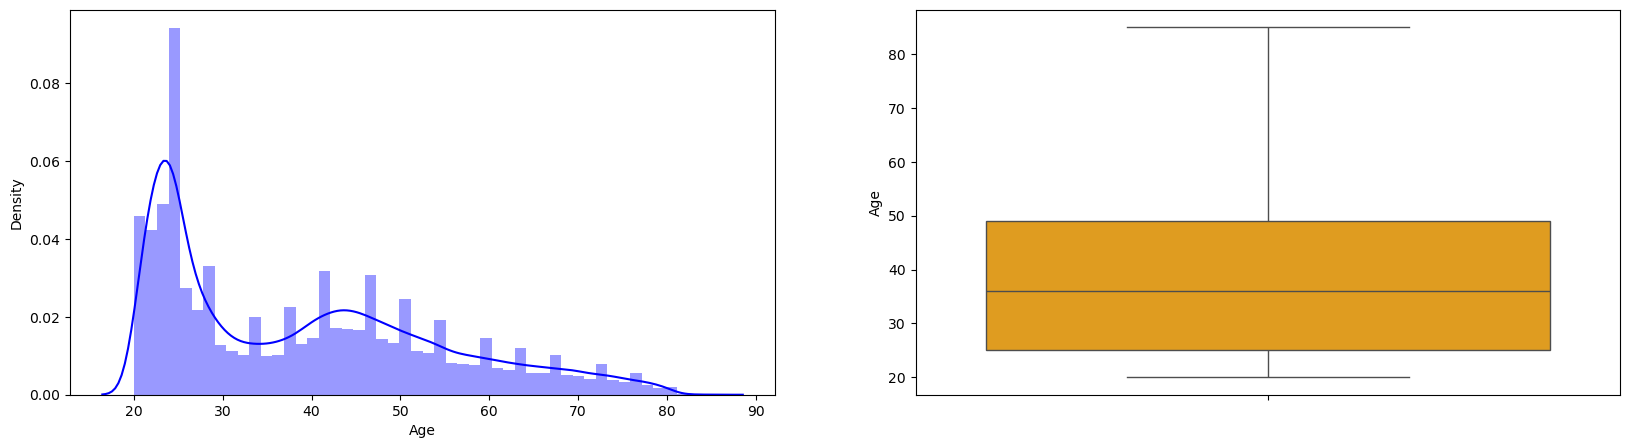

In [21]:
# Age
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(train['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(train['Age'],ax = axx[1],color='Orange')

In [22]:
# Count of the indivisuals with age 24 are greater in the dataset
# As per the plot age column has right skewness

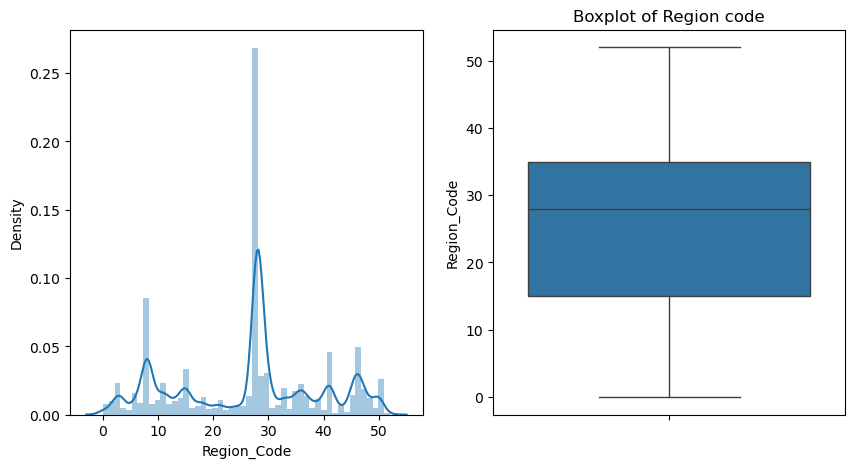

In [23]:
# Region_Code
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(train['Region_Code'])
train['Region_Code'].plot
plt.subplot(1,2,2)
plt.title("Region_Code")
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()

In [24]:
# The region code 28 is highest as compared to the other ones
# Based on box plot there is no outliers in the data

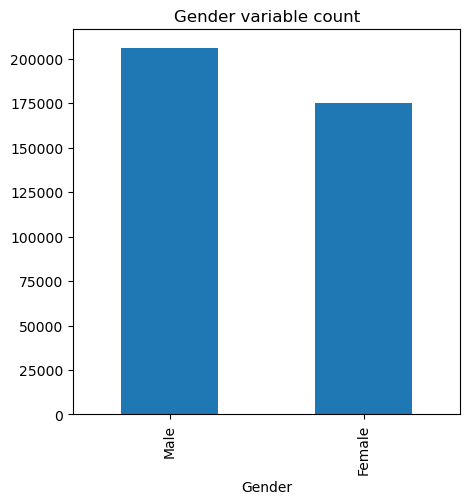

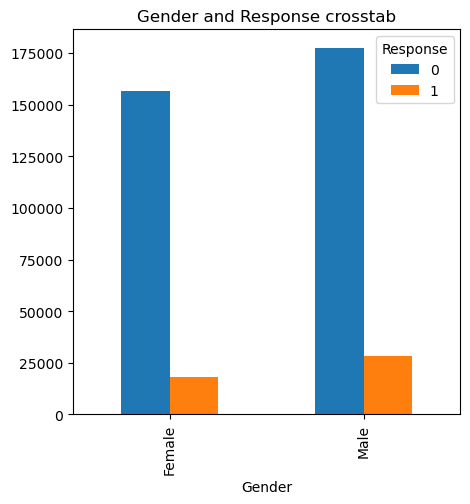

In [25]:
# Gender
plt.figure(figsize = (5,5))
train["Gender"].value_counts().plot.bar()
plt.title("Gender variable count")
DL = pd.crosstab(train['Gender'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Gender and Response crosstab")
plt.show()

In [26]:
# Gender variable count almost equally distributed
# Male category is slightly greater than that of female and chances of buying the insurance is also little high.

In [27]:
#train=train.drop(columns=['id'],axis=1)
#test=test.drop(columns=['id'],axis=1)

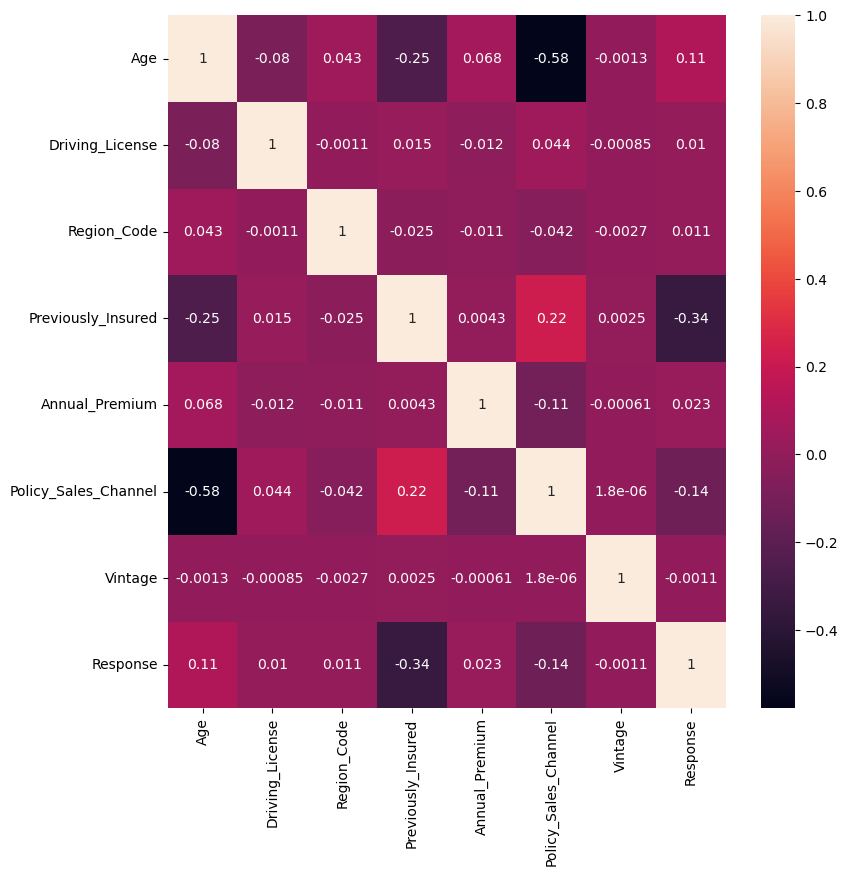

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(train.drop(columns=['id']).select_dtypes(include=np.number).corr(), annot = True)
plt.show()

In [29]:
# From the correlation plot we observe that policy sales channel has Strong Negative  correlation with Age variable, 
# This may be the indication of multicollinearity.
# This indicates that as Age increases, there is a tendency for customers to use different sales channels compared to younger customers.
# Example: Older customers might prefer specific offline or direct sales channels
# Negative Correlation with Previously_Insured (-0.34): Uninsured individuals are more likely to respond.

## Data Cleaning

In [30]:
# Finding the null values from all the columns
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [31]:
# There is no null value in any of the columns. 
train.duplicated().sum()

0

In [32]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [33]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [36]:
#converting categorical features to numerical features
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train['Vehicle_Damage']=train['Vehicle_Damage'].replace({'Yes':1,'No':0})
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test['Vehicle_Damage']=test['Vehicle_Damage'].replace({'Yes':1,'No':0})
test['Vehicle_Age']=test['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [37]:
train['Vintage'] = train['Vintage']/365
test['Vintage'] = test['Vintage']/365

In [38]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,0.594521,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,0.501370,0


In [39]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,0.145205
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,0.304110
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,0.545205
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,0.512329
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,0.813699


## Label encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['is_train'] = 1               
test['is_train'] = 0
test['Response'] = None
df = pd.concat((train,test))       # Combining train and test together for preprocessing 
df.tail(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
127035,508145,1,71,1,28.0,1,1,0,62875.0,26.0,0.726027,None,0
127036,508146,1,41,1,29.0,1,1,0,27927.0,124.0,0.632877,None,0


In [41]:
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,0.594521,1,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,0.501370,0,1
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,0.073973,1,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,0.556164,0,1
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,0.106849,0,1


In [42]:
# converting the float variables to int because Boosting dosen't take float for categorical variables 
train['Region_Code'] = train['Region_Code'].astype(int)  
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype(int) 

In [43]:
train = df[df['is_train']==1]                             
test = df[df['is_train']==0]
train = train.drop(['is_train'],axis=1)              
test = test.drop(['is_train','Response'] ,axis=1)

train['Response'] = train['Response'].astype(int)  # Converting object to int
train.shape , test.shape

((381109, 12), (127037, 11))

In [44]:
# Save the ID column in a separate variable
id_column = train['id'].copy()

col_split = train.columns.tolist()
col_split.remove('id')
col_split.remove('Response')
col_split.remove('Annual_Premium')
num_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [45]:
print(num_col)

['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']


## Splitting data for training and validation

In [46]:
X=train[col_split]
y=train['Response']

In [47]:
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,26.0,0.594521
1,1,76,1,3.0,0,1,0,26.0,0.501370


In [48]:
num_pipe_encode = Pipeline(
    steps = [
        ('scale',StandardScaler())# Cat Encoding
    ]
)  

In [49]:
# Pre-Processing
preprocess = ColumnTransformer(
    transformers = [
        ('num_encode',num_pipe_encode, num_col)
    ]
)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [51]:
model_pipeline = Pipeline(
    steps = [
        ('Preprocessing',preprocess),
        ('model', LogisticRegression())

    ]
)

In [52]:

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((304887, 9), (76222, 9), (304887,), (76222,))

In [53]:
train_X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage
332803,0,39,1,15.0,0,1,1,55.0,0.621918
116248,1,38,1,11.0,0,1,1,26.0,0.079452


In [54]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Vehicle_Age',
                                                   'Vehicle_Damage',
                                                   'Policy_Sales_Channel'])])),
                ('model', LogisticRegression())])

In [55]:
# Perform prediction with train itself
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):

    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Train cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Train cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    y_pred_prob = model_pipeline.predict_proba(val_X) [:,1]
    plt.figure()
    fgr, tpr, thrsh = roc_curve(val_y,y_pred_prob)
    plt.plot(fgr, tpr)
    plt.show()

Train AUC
0.5
Valid AUC
0.5
Train cnf_matrix
[[267700      0]
 [ 37187      0]]
Train cnf_matrix
[[66699     0]
 [ 9523     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.00      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.44      0.50      0.47    304887
weighted avg       0.77      0.88      0.82    304887

Train cls rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



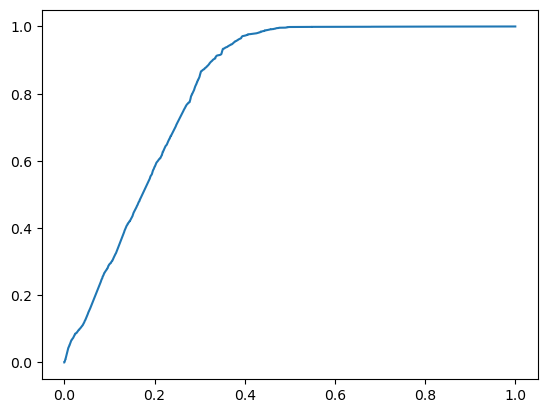

In [57]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [58]:
param = [
    {
        'model':(LogisticRegression(),),
        'model__penalty' : ['l2', None],
        'model__C':[0.5,3]
    }
]

In [59]:
grid = GridSearchCV(estimator=model_pipeline,param_grid=param, cv=2, scoring='roc_auc')

In [60]:

grid.fit(train_X,train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('num_encode',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'Driving_License',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage',
                                                                          'Policy_Sales_Channel'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': (LogisticRegression(C=0.5),),
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [61]:
grid.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [62]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.817047,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.817047,2
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.817047,4
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.817047,2


In [63]:
submisssion.head(2)

,id,Response
0,381110,0
1,381111,0


In [64]:
missing_cols  = train.columns.difference(test.columns)
missing_cols

Index(['Response'], dtype='object')

In [65]:
submisssion['Response'] = model_pipeline.predict(test)

In [66]:
submisssion.to_csv('submission-LogisticRegression.csv', index=False)

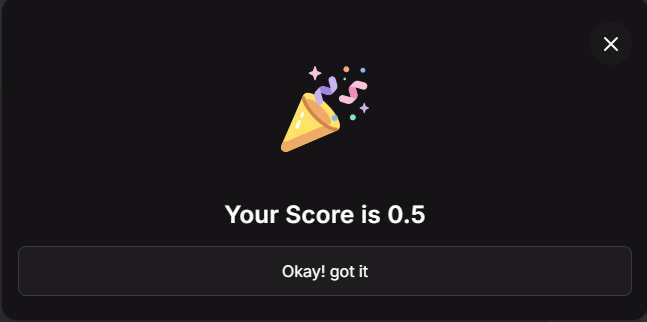

In [67]:
# create the pickle file
joblib.dump(model_pipeline, 'promote_pipeline_model.pkl')

['promote_pipeline_model.pkl']

In [68]:
train.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                  int32
dtype: object

## Cat Boost Model

In [69]:
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

In [83]:


#cat = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations= 500, depth= 9, border_count= 20,eval_metric = 'AUC')

#cat= cat.fit(train_X, train_y,cat_features=num_col,eval_set=(val_X, val_y),early_stopping_rounds=70,verbose=50)

#pred_proba = cat.predict_proba(val_X)[:, 1]
#print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(val_y,pred_proba)))

In [71]:
train_X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 304887 entries, 332803 to 121958
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                304887 non-null  int64  
 1   Age                   304887 non-null  int64  
 2   Driving_License       304887 non-null  int64  
 3   Region_Code           304887 non-null  float64
 4   Previously_Insured    304887 non-null  int64  
 5   Vehicle_Age           304887 non-null  int64  
 6   Vehicle_Damage        304887 non-null  int64  
 7   Policy_Sales_Channel  304887 non-null  float64
 8   Vintage               304887 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 23.3 MB


In [72]:
train_X['Region_Code'] = train_X['Region_Code'].astype('category').astype(int)
train_X['Policy_Sales_Channel'] = train_X['Policy_Sales_Channel'].astype('category').astype(int)
train_X['Vintage'] = train_X['Vintage'].astype('category').astype(int)

In [73]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304887 entries, 332803 to 121958
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Gender                304887 non-null  int64
 1   Age                   304887 non-null  int64
 2   Driving_License       304887 non-null  int64
 3   Region_Code           304887 non-null  int32
 4   Previously_Insured    304887 non-null  int64
 5   Vehicle_Age           304887 non-null  int64
 6   Vehicle_Damage        304887 non-null  int64
 7   Policy_Sales_Channel  304887 non-null  int32
 8   Vintage               304887 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 19.8 MB


In [74]:
val_X['Region_Code'] = val_X['Region_Code'].astype('category').astype(int)
val_X['Policy_Sales_Channel'] = val_X['Policy_Sales_Channel'].astype('category').astype(int)
val_X['Vintage'] = val_X['Vintage'].astype('category').astype(int)

In [75]:
val_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76222 entries, 200222 to 185839
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Gender                76222 non-null  int64
 1   Age                   76222 non-null  int64
 2   Driving_License       76222 non-null  int64
 3   Region_Code           76222 non-null  int32
 4   Previously_Insured    76222 non-null  int64
 5   Vehicle_Age           76222 non-null  int64
 6   Vehicle_Damage        76222 non-null  int64
 7   Policy_Sales_Channel  76222 non-null  int32
 8   Vintage               76222 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 4.9 MB


In [85]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

param_1 = [
    # Logistic Regression
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C': [0.5, 3],
    },
    # Decision Tree Classifier
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3, 5],
    },
    # Stacking Classifier
    {
        'model': [StackingClassifier(
            estimators=[
                ('sclf1', RandomForestClassifier()),
                ('sclf2', GradientBoostingClassifier()),
                ('sclf3', AdaBoostClassifier()),
            ],
            final_estimator=LogisticRegression()
        )],
        'model__sclf1__max_depth': [4, 8],
        'model__sclf2__n_estimators': [15, 25],
        'model__sclf3__n_estimators': [5, 35],
    },
    # CatBoost Classifier
    {
        'model': [CatBoostClassifier(silent=True)],  # Silent to avoid excessive logs
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__depth': [4, 6, 8],
        'model__iterations': [100, 200],
        'model__l2_leaf_reg': [1, 3, 5],
    },
]


In [86]:
grid = GridSearchCV(estimator=model_pipeline,param_grid=param_1, cv=2, scoring='roc_auc')

In [87]:
grid.fit(train_X,train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('num_encode',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'Driving_License',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage',
                                                                          'Policy_Sales_Channel'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()]...
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]},
                         {'model': [<catboost.core.CatBoostClassifier object at 0x00000182B3C21F50>],
                          'model__depth': [4, 6, 8],
                          'model__iterations': [100, 200],
                          'model__l2_leaf_reg': [1, 3, 5],
                          'model__learning_rate': [0.01, 0.1, 0.2]}],
             scoring='roc_auc')

In [88]:
grid.best_params_

{'model': <catboost.core.CatBoostClassifier at 0x182b3c21f50>,
 'model__depth': 4,
 'model__iterations': 200,
 'model__l2_leaf_reg': 3,
 'model__learning_rate': 0.2}

In [89]:
new_model = grid.best_estimator_

Train AUC
0.5003734825692266
Valid AUC
0.5002025514002901
Train cnf_matrix
[[267684     16]
 [ 37157     30]]
Train cnf_matrix
[[66691     8]
 [ 9518     5]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.65      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.77      0.50      0.47    304887
weighted avg       0.85      0.88      0.82    304887

Train cls rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.38      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.63      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



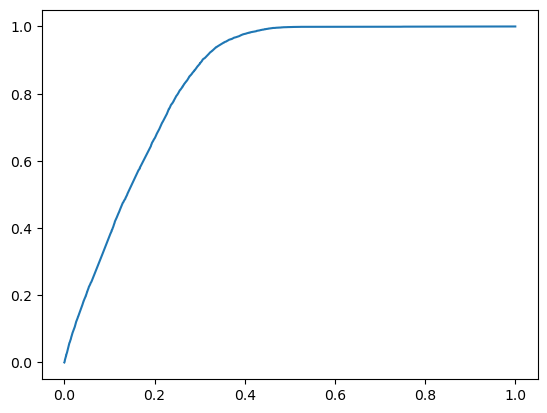

In [90]:
model_train_val_eval(train_X, val_X, train_y, val_y, new_model)

In [93]:
res_df_3 = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',150)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.817047,65
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.817047,66
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.817047,68
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.817047,66
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.817920,64
...,...,...,...
63,"{'model': <catboost.core.CatBoostClassifier object at 0x00000182B3C21F50>, 'model__depth': 8, 'model__iterations': 200, 'model__l2_leaf_reg': 3, '...",0.841200,5
64,"{'model': <catboost.core.CatBoostClassifier object at 0x00000182B3C21F50>, 'model__depth': 8, 'model__iterations': 200, 'model__l2_leaf_reg': 3, '...",0.840288,24
65,"{'model': <catboost.core.CatBoostClassifier object at 0x00000182B3C21F50>, 'model__depth': 8, 'model__iterations': 200, 'model__l2_leaf_reg': 5, '...",0.836451,42
66,"{'model': <catboost.core.CatBoostClassifier object at 0x00000182B3C21F50>, 'model__depth': 8, 'model__iterations': 200, 'model__l2_leaf_reg': 5, '...",0.841052,8


In [94]:
submisssion['Response']=new_model.predict(test)

In [95]:
submisssion.to_csv('submission_2.csv', index=False)

In [82]:
# Train the CatBoostClassifier
cat = CatBoostClassifier(
    learning_rate=0.03,
    l2_leaf_reg=1,
    iterations=500,
    depth=9,
    border_count=20,
    eval_metric='AUC'
)

In [77]:
cat.fit(
    train_X, train_y,
    cat_features=num_col,
    eval_set=(val_X, val_y),
    early_stopping_rounds=70,
    verbose=50
)

0:	test: 0.8388640	best: 0.8388640 (0)	total: 466ms	remaining: 3m 52s
50:	test: 0.8571471	best: 0.8571471 (50)	total: 13.3s	remaining: 1m 57s
100:	test: 0.8602735	best: 0.8602735 (100)	total: 31s	remaining: 2m 2s
150:	test: 0.8609344	best: 0.8609344 (150)	total: 46.6s	remaining: 1m 47s
200:	test: 0.8612780	best: 0.8612811 (198)	total: 59.5s	remaining: 1m 28s
250:	test: 0.8613547	best: 0.8613547 (250)	total: 1m 10s	remaining: 1m 10s
300:	test: 0.8614051	best: 0.8614090 (292)	total: 1m 22s	remaining: 54.5s
350:	test: 0.8614788	best: 0.8614858 (344)	total: 1m 33s	remaining: 39.6s
400:	test: 0.8615125	best: 0.8615125 (400)	total: 1m 44s	remaining: 25.8s
450:	test: 0.8615368	best: 0.8615750 (434)	total: 1m 58s	remaining: 12.9s
499:	test: 0.8615014	best: 0.8615750 (434)	total: 2m 11s	remaining: 0us

bestTest = 0.8615749604
bestIteration = 434

Shrink model to first 435 iterations.


In [78]:
id_column.head(2)

0    1
1    2
Name: id, dtype: int64

In [79]:
id_column_filtered = id_column.loc[val_X.index]
id_column_filtered

200222    200223
49766      49767
172201    172202
160713    160714
53272      53273
           ...  
258403    258404
234155    234156
24476      24477
60423      60424
185839    185840
Name: id, Length: 76222, dtype: int64

In [ ]:
# Generate predictions (for probabilities)
predictions_proba = cat.predict_proba(val_X)[:, 1]

# Ensure id_column corresponds to val_X rows
#id_column_filtered = id_column.loc[val_X.index]

# Combine with IDs
output = pd.DataFrame({  # Replace with the name of the identifier column
    #
    #'id': id_column_filtered,
    'Response': predictions_proba
})

# Save to a CSV file
output.to_csv('submission-CATBoosting.csv', index=False)